## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
import warnings

#### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('stud.csv')

#### Show Top 5 Records

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Preparing X and Y variables

In [4]:
X = df.drop(columns=['math score'],axis=1)

In [5]:
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [6]:
columns = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

for col in columns:
    print(f"Categories in '{col}' variable: {df[col].unique()}")

'''
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())
'''

Categories in 'gender' variable: ['female' 'male']
Categories in 'race/ethnicity' variable: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable: ['standard' 'free/reduced']
Categories in 'test preparation course' variable: ['none' 'completed']


'\nprint("Categories in \'gender\' variable:     ",end=" " )\nprint(df[\'gender\'].unique())\n\nprint("Categories in \'race_ethnicity\' variable:  ",end=" ")\nprint(df[\'race_ethnicity\'].unique())\n\nprint("Categories in\'parental level of education\' variable:",end=" " )\nprint(df[\'parental_level_of_education\'].unique())\n\nprint("Categories in \'lunch\' variable:     ",end=" " )\nprint(df[\'lunch\'].unique())\n\nprint("Categories in \'test preparation course\' variable:     ",end=" " )\nprint(df[\'test_preparation_course\'].unique())\n'

In [7]:
y = df['math score']

In [8]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [9]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [10]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler # Mean of 0 scale of 1 [StandardScaler]
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [11]:
X = preprocessor.fit_transform(X)

In [12]:
X.shape

(1000, 19)

In [13]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

#### Create an Evaluate Function to give all metrics after model Training

In [14]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [15]:
'''
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
}
'''
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "SVM": SVR()
}

model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3244
- Mean Absolute Error: 4.2671
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3960
- Mean Absolute Error: 4.2158
- R2 Score: 0.8803


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7077
- Mean Absolute Error: 4.5167
- R2 Score: 0.8555
-----------------------

### Results

In [16]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.880345
7,CatBoosting Regressor,0.851632
5,Random Forest Regressor,0.850407
8,AdaBoost Regressor,0.847333
1,Lasso,0.825320
6,XGBRegressor,0.821589
3,K-Neighbors Regressor,0.783813
4,Decision Tree,0.760272
9,SVM,0.728600


## Ridge Model

In [17]:
y_test_copy = y_test.copy()
X_test_copy = X_test.copy()

##### This code re-trains the best performing Ridge model on the entire dataset (X and y). It then makes predictions on new data stored in X_test_copy using the predict() method of the Ridge model and stores them in y_pred_ridge. Finally, it calculates the R-squared score of the model's predictions by comparing them with the actual target values stored in y_test_copy using the r2_score() function from scikit-learn and prints the accuracy score as a percentage.

In [27]:
# Retrain the best performing model on the entire dataset
model = Ridge(fit_intercept=True)
model.fit(X, y)
# Make predictions on new data
y_pred_ridge = model.predict(X_test_copy)

#accuracy
score_ridge = r2_score(y_test_copy, y_pred_ridge)*100
print(" Accuracy of the model is %.2f" %score_ridge)

 Accuracy of the model is 88.66


### Plot y_test_copy & y_pred_ridge

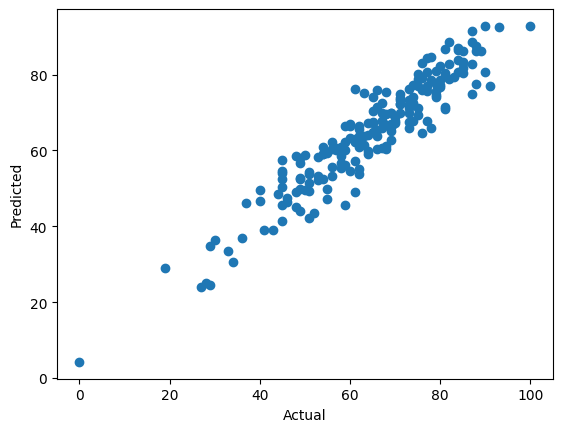

In [19]:
plt.scatter(y_test_copy,y_pred_ridge);
plt.xlabel('Actual');
plt.ylabel('Predicted');

#### Difference between Actual and Predicted Values

In [20]:
ridge_pred_df=pd.DataFrame({'Actual Value':y_test_copy,'Predicted Value':y_pred_ridge,'Difference':y_test_copy-y_pred_ridge})
ridge_pred_df

,Actual Value,Predicted Value,Difference
521,91,76.883729,14.116271
737,53,58.211613,-5.211613
740,80,77.149616,2.850384
660,74,77.184073,-3.184073
411,84,86.911881,-2.911881
...,...,...,...
408,52,43.433863,8.566137
332,62,61.878601,0.121399
208,74,67.813716,6.186284
613,65,67.517906,-2.517906


## Linear Regression

In [21]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.03


## Plot y_pred and y_test

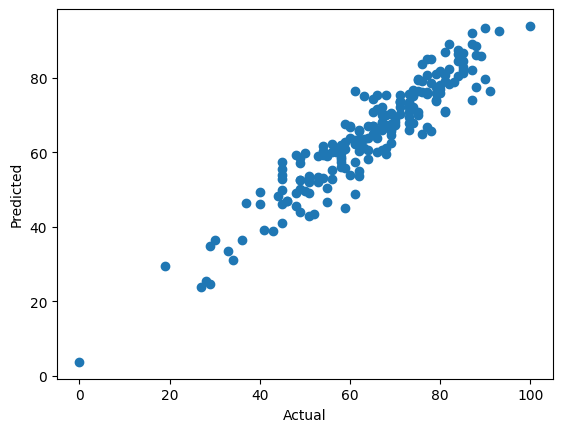

In [22]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

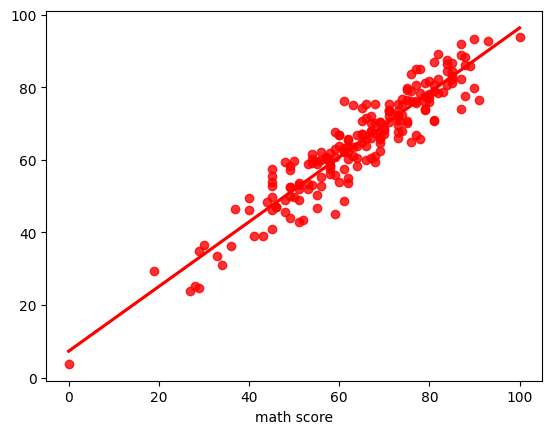

In [23]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

#### Difference between Actual and Predicted Values

In [24]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.507812,14.492188
737,53,58.953125,-5.953125
740,80,76.960938,3.039062
660,74,76.757812,-2.757812
411,84,87.539062,-3.539062
...,...,...,...
408,52,43.546875,8.453125
332,62,62.031250,-0.031250
208,74,67.976562,6.023438
613,65,67.132812,-2.132812


#### Difference between 2 tested Models [Ridge & Linear Regression] in a plot

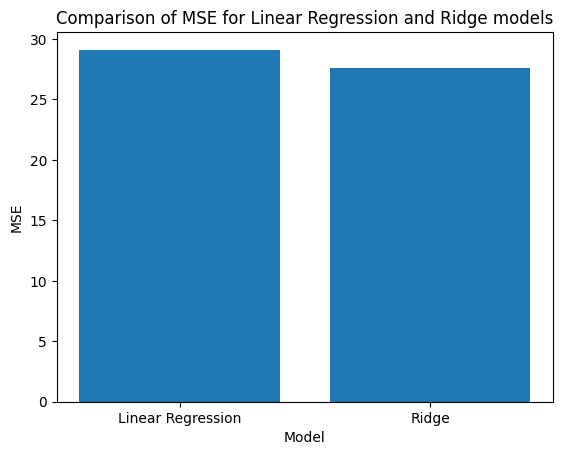

In [25]:
import matplotlib.pyplot as plt

mse_lin = mean_squared_error(y_test, y_pred)
mse_ridge = mean_squared_error(y_test_copy, y_pred_ridge)

plt.bar(['Linear Regression', 'Ridge'], [mse_lin, mse_ridge])
plt.title('Comparison of MSE for Linear Regression and Ridge models')
plt.xlabel('Model')
plt.ylabel('MSE')
plt.show()

### Insight: Regression model has a higher error rate than the Ridge model

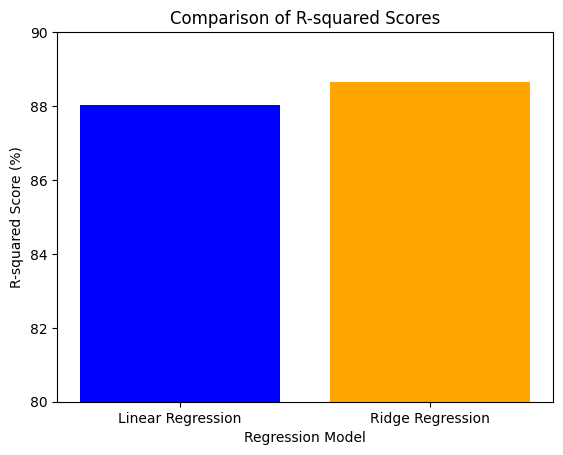

In [26]:
import matplotlib.pyplot as plt

# Calculate R-squared scores
score_lin = r2_score(y_test, y_pred) * 100
score_ridge = r2_score(y_test_copy, y_pred_ridge) * 100

# Plot bar chart
plt.bar(['Linear Regression', 'Ridge Regression'], [score_lin, score_ridge], color=['blue', 'orange'])
plt.title('Comparison of R-squared Scores')
plt.xlabel('Regression Model')
plt.ylabel('R-squared Score (%)')
plt.ylim(80, 90)
plt.show()

### Conclusion
- Based on performance evaluation of the two models, Ridge and Linear Regression
- Ridge model has higher R-squared value compared to Linear Regression model.
- Although the mean squared error (MSE) was slightly higher for the Linear Regression model, this does not seem to be a decisive factor in choosing the best model.
- Therefore, we can conclude that Ridge model performs better than the Linear Regression model for this dataset.